<div style="display: flex; align-items: center; justify-content: space-between; border-bottom: 3px solid #D0D0D0; padding: 10px; font-family: Arial, sans-serif;">
  <!-- Logo -->
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/Uoc_masterbrand_vertical.png" alt="Logo" style="width: 150px; height: auto;">

  <!-- Detalles -->
  <div style="text-align: right; line-height: 1.6; margin-left: 20px; margin-right: 80px">
    <p style="margin: 0; font-size: 1.2em; font-weight: bold; color: #333;">Proyecto: <span style="color: #878787;">Práctica - Parte 2</span></p>
    <p style="margin: 0; font-size: 1em; font-weight: bold; color: #333;">Notebook: <span style="color: #878787;">Exploración inicial de datos de sueño</span></p>
    <p style="color: #878787;">Juan Luis González Rodríguez - Visualización de datos</span></p>
  </div>
</div>

# 0. Librerías

In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# 1.Exploración y limpieza de datos

In [39]:
# Creamos un df vacio
df_sleep = pd.DataFrame()

# Obtenemos la lista con los paths de los archivos
data_path = os.path.join('..', '0_data', 'MMASH')
csv_files = [os.path.join(root, file) for root, _, files in os.walk(data_path) for file in files if file.endswith('sleep.csv')]

# Iteramos sobre los archivos
for file in csv_files:
    # Leemos el archivo
    df = pd.read_csv(file, usecols=lambda column: column != 'Unnamed: 0')
    # Extraemos el identificador del usuario del nombre del fichero
    user_id = os.path.basename(os.path.dirname(file))
    # Añadimos la columna 'User' al dataframe
    df['User'] = user_id
    # Concatenamos el df al df principal si no está vacío
    if not df.empty:
        df_sleep = pd.concat([df_sleep, df])

# Ordenamos por ususario
df_sleep['User_id'] = df_sleep['User'].str.extract(r'(\d+)').astype(int)
df_sleep = df_sleep.sort_values(by='User_id').drop(columns='User_id')

In [40]:
df_sleep

,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index,User
0,2,00:46,2,03:31,2,00:46,0,87.27,165,144,21,9,2.33,9.091,10.000,19.091,user_1
1,2,03:57,2,07:30,2,03:57,0,92.02,213,196,17,9,1.89,8.920,0.000,8.920,user_1
0,2,00:50,2,06:22,2,00:54,4,73.49,332,244,84,18,4.67,15.060,5.556,20.616,user_2
0,1,22:29,1,05:52,1,22:32,3,79.23,443,351,89,16,5.56,18.962,0.000,18.962,user_3
0,2,00:57,2,07:10,2,01:01,4,85.52,373,319,50,28,1.79,8.847,14.286,23.133,user_4
0,1,23:56,1,06:42,1,23:56,0,85.71,406,348,58,21,2.76,11.576,9.524,21.100,user_5
0,2,02:27,2,09:02,2,02:27,0,84.30,395,333,62,20,3.10,10.633,4.762,15.395,user_6
0,2,00:28,2,08:02,2,00:28,0,75.33,454,342,112,31,3.61,17.401,28.125,45.526,user_7
0,2,00:17,2,07:13,2,00:20,3,80.77,416,336,77,27,2.85,17.308,25.926,43.234,user_8
0,2,00:30,2,11:00,2,00:33,3,91.75,630,578,49,4,12.25,8.095,0.000,8.095,user_9


Se comprueba que todos los individuos tienen la misma cantidad de registros.

In [41]:
# Get the list of users
users = [os.path.basename(os.path.dirname(file)) for file in csv_files]
users = sorted(users, key=lambda x: int(x.split('_')[1]))

# Check if all users have the same amount of records and print the number of records for each user
for user in users:
    print(f'User {user} has \t{df_sleep[df_sleep["User"] == user].shape[0]} records')

User user_1 has 	2 records
User user_2 has 	1 records
User user_3 has 	1 records
User user_4 has 	1 records
User user_5 has 	1 records
User user_6 has 	1 records
User user_7 has 	1 records
User user_8 has 	1 records
User user_9 has 	1 records
User user_10 has 	1 records
User user_11 has 	0 records
User user_12 has 	1 records
User user_13 has 	1 records
User user_14 has 	1 records
User user_15 has 	1 records
User user_16 has 	1 records
User user_17 has 	1 records
User user_18 has 	1 records
User user_19 has 	1 records
User user_20 has 	1 records
User user_21 has 	1 records
User user_22 has 	1 records


La mayoría de los individuos tienen 1 registro de sueño. Sin embargo, el individuo 1 tiene 2 registros. Los autores del dataset en el artículo [1] indican que esto se debe a que se despertó durante un tiempo prolongado (más de 40 minutos) durante la noche, resultando en dos periodos de sueño independientes. Por otro lado, los autores indican que el individuo 11 no tiene ningún registro de sueño debido a problemas técnicos con la grabación de datos.


Se ploteará el tiempo de sueño de cada usuario en función de la fecha y hora del periodo de sueño.

In [42]:
# Convertir las fechas y horas a un formato datetime
df_sleep['In Bed DateTime'] = pd.to_datetime(df_sleep['In Bed Date'].astype(str) + ' ' + df_sleep['In Bed Time'], format='%d %H:%M')
df_sleep['Out Bed DateTime'] = pd.to_datetime(df_sleep['Out Bed Date'].astype(str) + ' ' + df_sleep['Out Bed Time'], format='%d %H:%M')

df_sleep[['In Bed DateTime', 'Out Bed DateTime', 'User']]

,In Bed DateTime,Out Bed DateTime,User
0,1900-01-02 00:46:00,1900-01-02 03:31:00,user_1
1,1900-01-02 03:57:00,1900-01-02 07:30:00,user_1
0,1900-01-02 00:50:00,1900-01-02 06:22:00,user_2
0,1900-01-01 22:29:00,1900-01-01 05:52:00,user_3
0,1900-01-02 00:57:00,1900-01-02 07:10:00,user_4
0,1900-01-01 23:56:00,1900-01-01 06:42:00,user_5
0,1900-01-02 02:27:00,1900-01-02 09:02:00,user_6
0,1900-01-02 00:28:00,1900-01-02 08:02:00,user_7
0,1900-01-02 00:17:00,1900-01-02 07:13:00,user_8
0,1900-01-02 00:30:00,1900-01-02 11:00:00,user_9


**Time in/out bed per user**

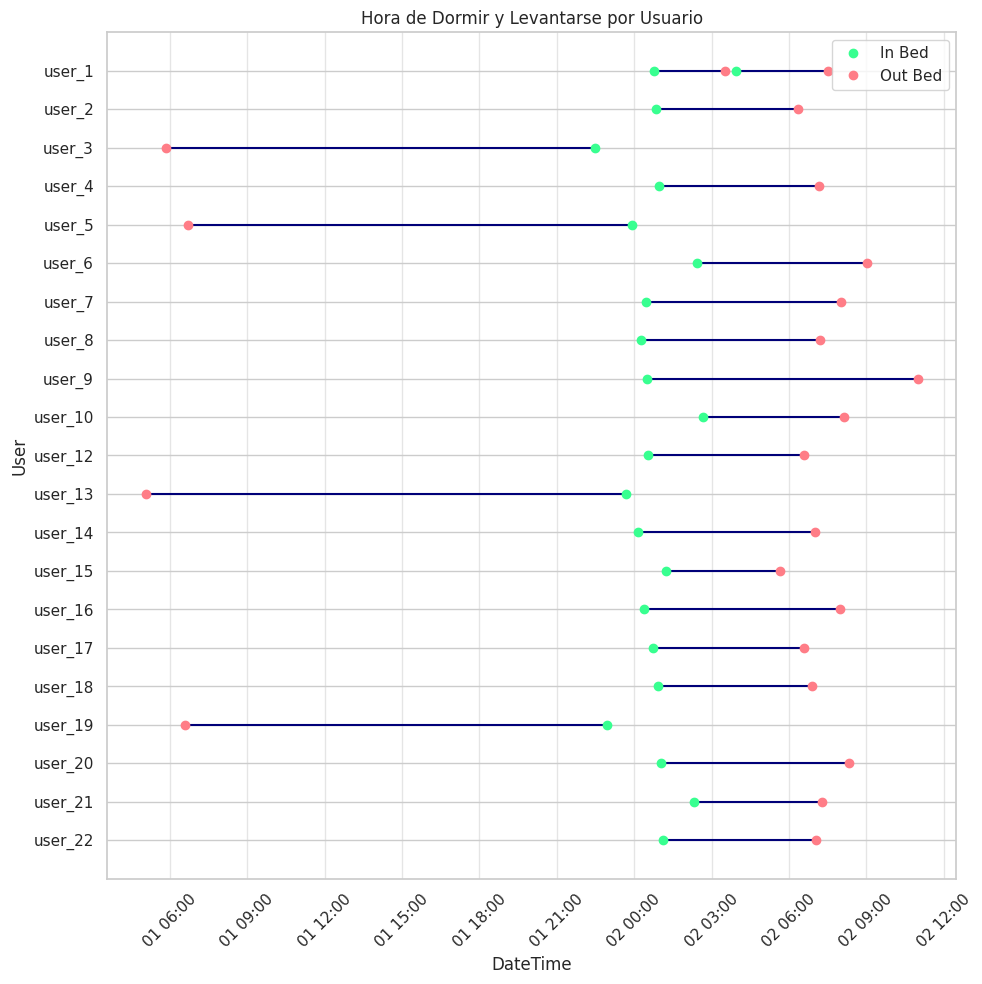

In [43]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 10))

# Iterar sobre cada usuario y plotear su hora de dormir y de levantarse
for user in users[::-1]:
    for sleeps in df_sleep[df_sleep['User'] == user].iterrows():
        ax.plot([sleeps[1]['In Bed DateTime'], sleeps[1]['Out Bed DateTime']], [user, user], color='#000078')
        ax.plot(sleeps[1]['In Bed DateTime'], user, 'o', color="#38FF90", label='In Bed' if user == users[0] else "")
        ax.plot(sleeps[1]['Out Bed DateTime'], user, 'o', color="#FF7D87", label='Out Bed' if user == users[0] else "")    

# Configurar etiquetas y título
ax.set_xlabel('DateTime')
ax.set_ylabel('User')
ax.set_title('Hora de Dormir y Levantarse por Usuario')

# Formatear el eje x para mostrar fecha y hora
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
plt.xticks(rotation=45)

# Añadir una leyenda con los puntos de inicio y fin de cada sueño
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Añadir líneas verticales
ax.xaxis.grid(True, alpha=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se ha observado que hay 4 usuarios con la ⚠️**fecha de salida de la cama anterior a la fecha de irse a la cama**⚠️. Esto es un error en la toma de datos que debe ser corregido. Lo más lógico es asumir que el día de salida de la cama es el siguiente, y no el mismo día de la fecha de irse a la cama. Por lo tanto, en estos 4 casos, la variable *Out Bed Date* tomará el valor de 2 en lugar de 1.

In [44]:
# Comprobamos si la salida de la cama es anterior a la entrada
df_sleep[df_sleep['Out Bed DateTime'] < df_sleep['In Bed DateTime']][['User', 'In Bed Date', 'In Bed Time', 'Out Bed Date', 'Out Bed Time']]

,User,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,user_3,1,22:29,1,05:52
0,user_5,1,23:56,1,06:42
0,user_13,1,23:41,1,05:04
0,user_19,1,22:56,1,06:35


In [45]:
# Para estos casos establecemos 2 en el Out Bed Date
df_sleep.loc[df_sleep['Out Bed DateTime'] < df_sleep['In Bed DateTime'], 'Out Bed Date'] = 2

# Recalculamos las variables datetime
df_sleep['In Bed DateTime'] = pd.to_datetime(df_sleep['In Bed Date'].astype(str) + ' ' + df_sleep['In Bed Time'], format='%d %H:%M')
df_sleep['Out Bed DateTime'] = pd.to_datetime(df_sleep['Out Bed Date'].astype(str) + ' ' + df_sleep['Out Bed Time'], format='%d %H:%M')

Se vuelve a plotear el gráfico tras las correcciones

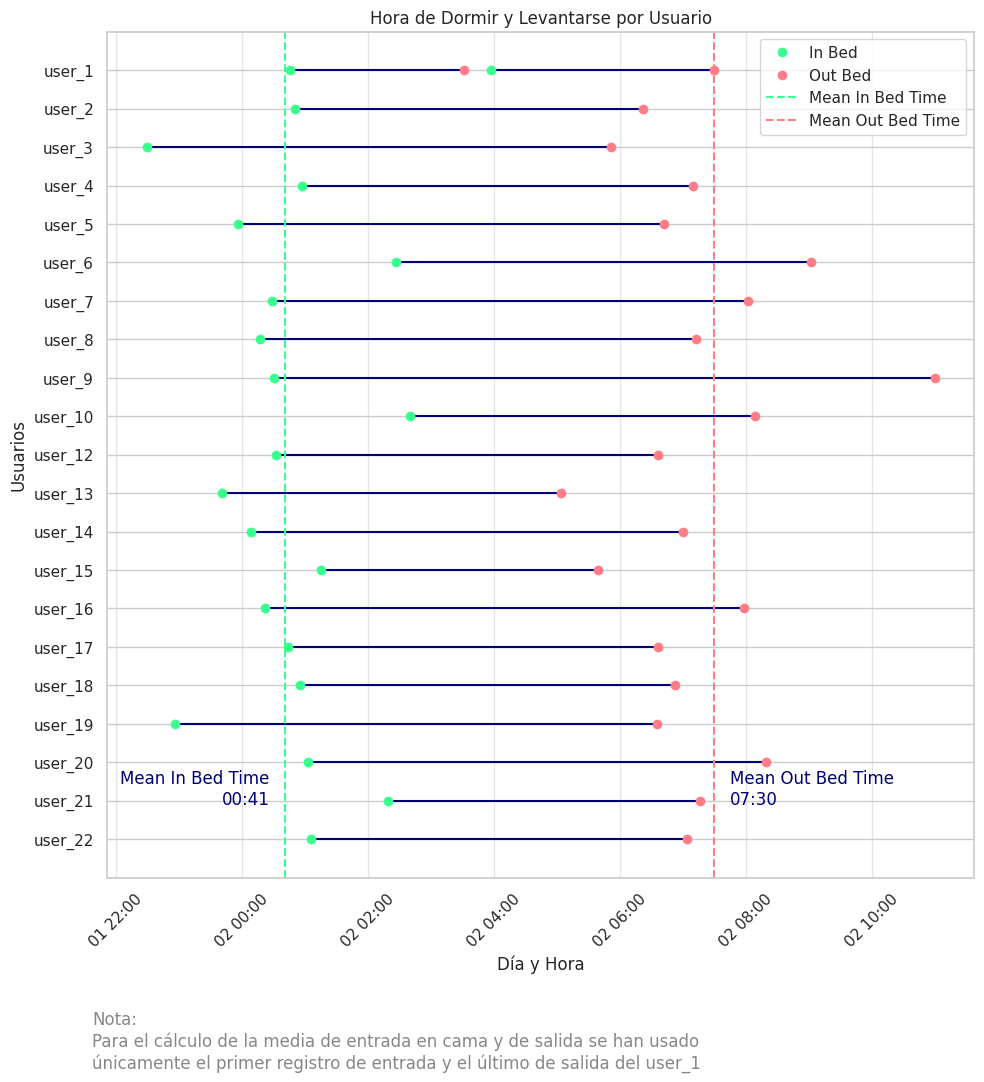

In [46]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 10))

# Iterar sobre cada usuario y plotear su hora de dormir y de levantarse
for user in users[::-1]:
    for _, sleep in df_sleep[df_sleep['User'] == user].iterrows():
        ax.plot([sleep['In Bed DateTime'], sleep['Out Bed DateTime']], [user, user], color='#000078')
        ax.plot(sleep['In Bed DateTime'], user, 'o', color="#38FF90", label='In Bed' if user == users[0] else "")
        ax.plot(sleep['Out Bed DateTime'], user, 'o', color="#FF7D87", label='Out Bed' if user == users[0] else "")    

# Línea con la hora media de entrada a la cama eliminando la segunda entrada del usuario 1 pero manteniendo el resto
mean_in_bed = df_sleep['In Bed DateTime'].drop(1).mean()
ax.axvline(x=mean_in_bed, color='#38FF90', linestyle='--', label='Mean In Bed Time')
ax.text(mean_in_bed - pd.Timedelta(minutes=15), 0.8, f'Mean In Bed Time\n{mean_in_bed.strftime("%H:%M")}', color="#000078", rotation=0, verticalalignment='bottom', horizontalalignment='right')

# Línea con la hora media de salida de la cama eliminando la primera salida del usuario 1 pero manteniendo el resto
mean_out_bed = df_sleep['Out Bed DateTime'].drop(0).mean()
ax.axvline(x=mean_out_bed, color='#FF7D87', linestyle='--', label='Mean Out Bed Time')
ax.text(mean_out_bed + pd.Timedelta(minutes=15), 0.8, f'Mean Out Bed Time\n{mean_out_bed.strftime("%H:%M")}', color="#000078", rotation=0, verticalalignment='bottom', horizontalalignment='left')

# Configurar etiquetas y título
ax.set_xlabel('Día y Hora')
ax.set_ylabel('Usuarios')
ax.set_title('Hora de Dormir y Levantarse por Usuario')

# Formatear el eje x para mostrar fecha y hora
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
plt.xticks(rotation=45)

# Añadir una leyenda con los puntos de inicio y fin de cada sueño
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Añadir líneas verticales
ax.xaxis.grid(True, alpha=0.5)

# Añadir una nota
fig.text(0.1, -0.05, 'Nota:\nPara el cálculo de la media de entrada en cama y de salida se han usado\núnicamente el primer registro de entrada y el último de salida del user_1', ha='left', va='center', color="#878787")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [47]:
df_sleep['Total Minutes in Bed'].describe()

count     22.000000
mean     374.318182
std       96.184043
min      165.000000
25%      329.750000
50%      368.500000
75%      431.000000
max      630.000000
Name: Total Minutes in Bed, dtype: float64

Se observa que la mayoría de los participantes se duermen poco después de la medianoche, aunque algunos como los usuarios 6, 10 y 21 lo hacen pasadas las 2 de la madrugada. Sin embargo, estos no son los que más tarde se levantan. La mayoría de los usuarios se levantan antes de las 7:30, aunque algunos como el usuario 9 lo hacen a las 11 de la mañana, convirtiéndolo en la persona que más tiempo pasa en la cama según los registros.

De los descriptivos numéricos de la variable precalculada *Total Minutes in Bed*, se extrae que, en promedio, los participantes pasan 374 minutos en la cama, con una mediana de 368.5 minutos y un máximo de 630 minutos (correspondiente al usuario 9) y un mínimo de 165 minutos para el primer periodo de sueño del usuario 1. Cabe señalar que este usuario tiene dos periodos independientes de sueño en la misma noche.

**Sleep efficiency**

La eficiencia se define como la cantidad de tiempo que, estando el individuo en la cama, está durmiendo. Para calcularla, se divide el tiempo total dormido entre el tiempo total en la cama. Se considerará aquella eficiencia superior al 85% como buena y los valores inferiores como malo, según se define en Evaluating the Sleep Quality Using Multiscale Entropy Analysis [2].

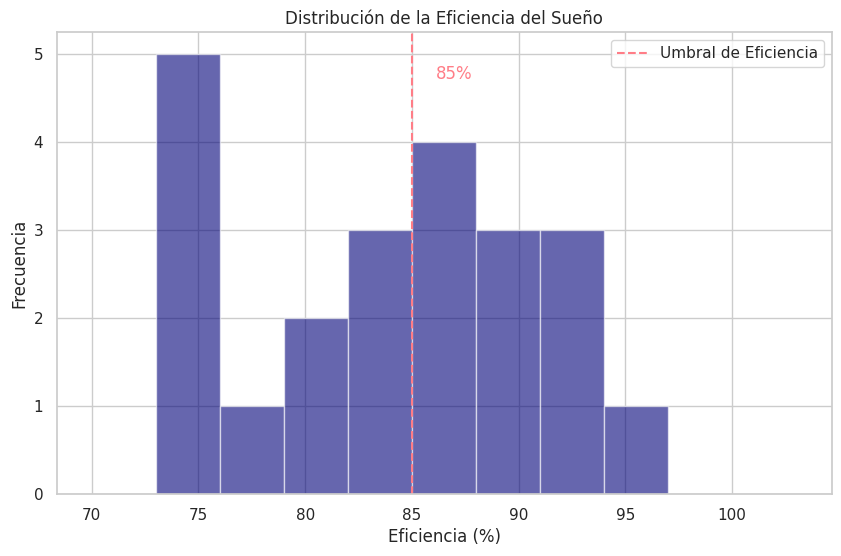

In [48]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.hist(df_sleep['Efficiency'], bins=range(70, 105, 3), color='#000078', alpha=0.6, edgecolor='white')
plt.axvline(x=85, color='#FF7D87', linestyle='--', label='Umbral de Eficiencia')
plt.text(85+2, plt.ylim()[1] * 0.9, '85%', color='#FF7D87', ha='center')

plt.title('Distribución de la Eficiencia del Sueño')
plt.xlabel('Eficiencia (%)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Cuenta cuantos están por debajo de 85 y cuantos por encima e imprimelo (no lo guardes en una variable)
print(f"Hay {df_sleep[df_sleep['Efficiency'] < 85].shape[0]} registros por debajo del umbral de eficiencia y {df_sleep[df_sleep['Efficiency'] >= 85].shape[0]} por encima")

Hay 11 registros por debajo del umbral de eficiencia y 11 por encima


La mitad de los registros de sueño tienen una eficiencia del sueño por debajo del umbral del 85%, esto se define como una eficiencia del sueño baja. Mientras que los 11 registros restantes tienen una eficiencia del sueño por encima del umbral del 85%, lo que se considera una eficiencia del sueño alta. Se creará una variable categórica que recoja esta información de manera binarizada, resumiendo el porcentaje de eficiencia del sueño en dos categorías: baja y alta.

In [50]:
df_sleep['Efficiency_bin'] = df_sleep['Efficiency'].apply(lambda x: 'good' if x >= 85 else 'bad')
df_sleep[['Efficiency', 'Efficiency_bin']]

,Efficiency,Efficiency_bin
0,87.27,good
1,92.02,good
0,73.49,bad
0,79.23,bad
0,85.52,good
0,85.71,good
0,84.30,bad
0,75.33,bad
0,80.77,bad
0,91.75,good


**WASO (Wake After Sleep Onset in minutes)**

Waso recoge los minutos que el usuario está despierto en la cama despues de quedarse dormido.

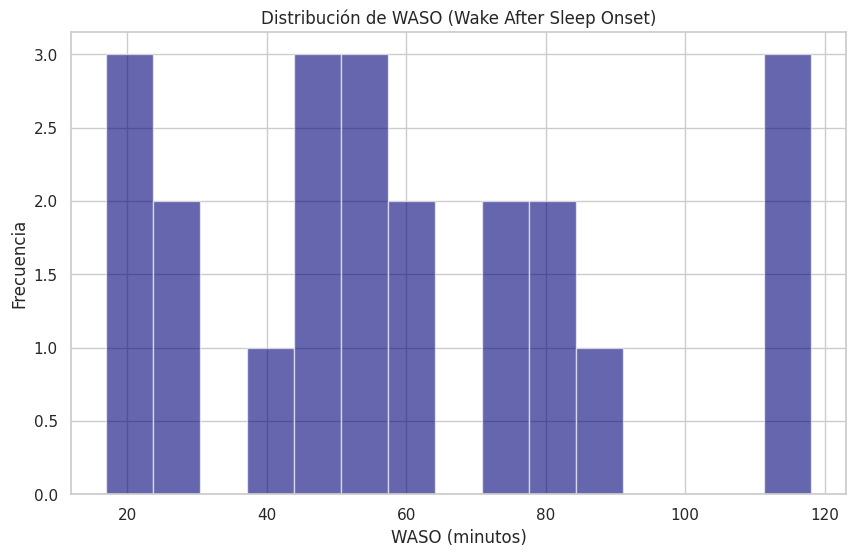

In [51]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.hist(df_sleep['Wake After Sleep Onset (WASO)'], bins=15, color='#000078', alpha=0.6, edgecolor='white')

plt.title('Distribución de WASO (Wake After Sleep Onset)')
plt.xlabel('WASO (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


En la población de estudio se observan varias zonas de frecuencias altas en la variable WASO. Por un lado, tenemos registros inferiores a 30 minutos. Por otro, aquellos que van entre 40 y 90 minutos y, finalmente, aquellos que superan los 110 minutos. Por lo que esta variable (íntimamente ligada con la eficiencia del sueño) nos muestra una gran variabilidad en la población de estudio.

**Sleep Fragmentation Index (SFI)**

El índice de fragmentación del sueño es la suma del índice de movimiento y del índice de fragmentación. Valores altos indican mucho movimiento y fragmentación, lo que puede ser un indicativo de un sueño de mala calidad. Mientras que los valores bajos indican un sueño de calidad. En la literatura, esta no es una variable estandarizada y varía en función de los instrumentos y software utilizados para la recogida de datos. Sin embargo, valores altos siempre son indicativos de un sueño de mala calidad.

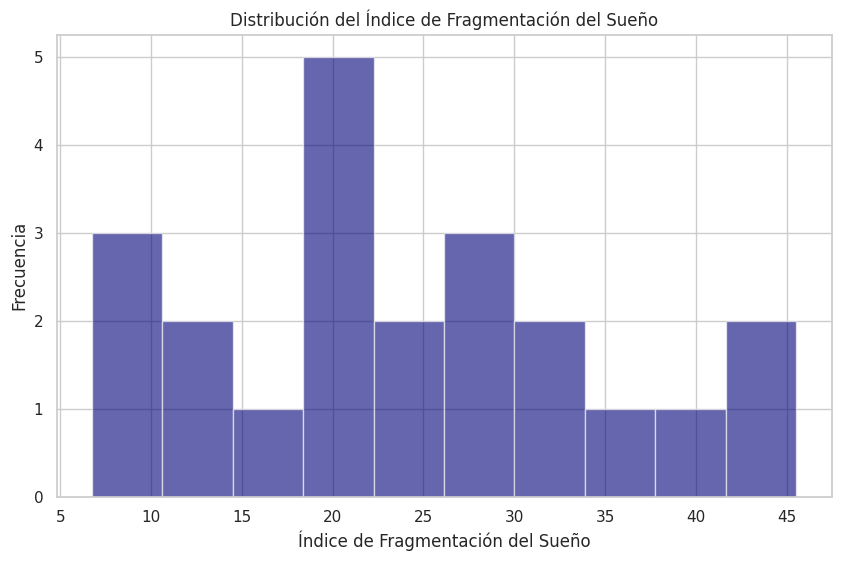

In [52]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.hist(df_sleep['Sleep Fragmentation Index'], bins=10, color='#000078', alpha=0.6, edgecolor='white')

plt.title('Distribución del Índice de Fragmentación del Sueño')
plt.xlabel('Índice de Fragmentación del Sueño')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La mayor frecuencia se concentra alrededor de un índice de 20. Los valores altos son menos comunes y reflejan una peor calidad del sueño, mientras que los valores bajos (entre 5 y 10) son poco frecuentes, indicando un sueño de buena calidad. Esto evidencia una variabilidad significativa en la calidad del sueño dentro de la población estudiada.

# 2. Análisis Bivariante

A continuación se realizará un análisis bivariante de la variables que componen el dataset sleep.

**Número de despertares sobre la eficiencia y el SFI**

Comenzaremos estudiando la relacion entre la eficiencia del sueño y el número de despertares. Parece lógico que las personas que se despiertan más veces tengan una eficiencia del sueño menor.

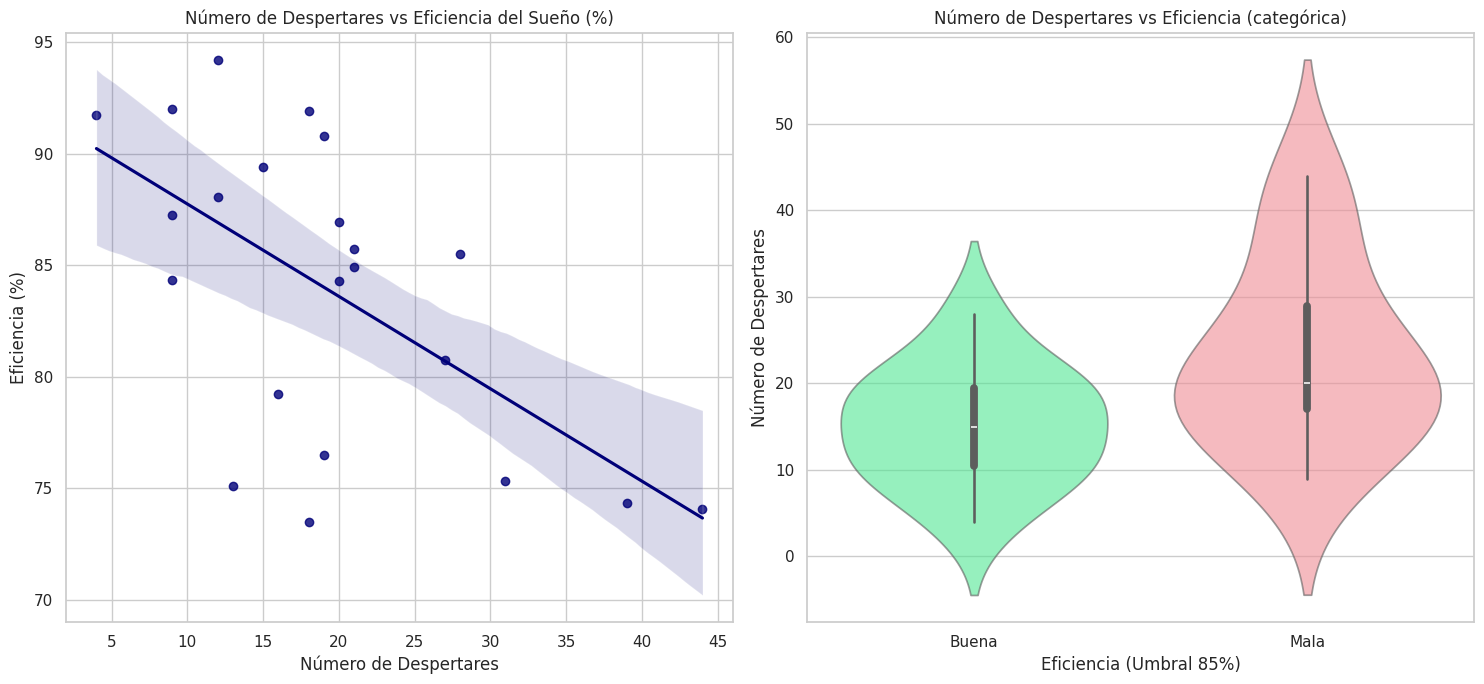

In [53]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Creamos una figura con 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# ax1 - Number of Awakenings vs Sleep efficiency
sns.regplot(data=df_sleep, x='Number of Awakenings', y='Efficiency', ax=ax1, color='#000078')
ax1.set_title('Número de Despertares vs Eficiencia del Sueño (%)')
ax1.set_xlabel('Número de Despertares')
ax1.set_ylabel('Eficiencia (%)')

# Ax2 - Number of Awakenings vs Sleep efficiency Category
df_sleep['Efficiency_bin'] = df_sleep['Efficiency_bin'].replace({'good': 'Buena', 'bad': 'Mala'})
sns.violinplot(data=df_sleep, x='Efficiency_bin', y='Number of Awakenings', ax=ax2, hue='Efficiency_bin', palette=['#38FF90', '#FF7D87'], legend=False, inner='box', alpha=0.6)
ax2.set_title('Número de Despertares vs Eficiencia (categórica)')
ax2.set_xlabel('Eficiencia (Umbral 85%)')
ax2.set_ylabel('Número de Despertares')

plt.tight_layout()
plt.show()


Vemos cómo hay una estrecha relación entre el número de despertares y la eficiencia del sueño, siendo esta peor cuanto mayor es el número de despertares. Podemos afirmar que un número alto de despertares afecta negativamente a la eficiencia del sueño. Sin embargo, y aunque es menos frecuente, también hay casos en los que el número de despertares es bajo y la eficiencia del sueño es mala. Esto puede deberse a otros factores como la duración del sueño, la fragmentación del sueño, el tiempo en la cama, etc.

Seguidamente analizaremos la eficiencia del sueño en función del SFI (Sleep Fragmentation Index). En principio, la lógica dice que a mayor índice de fragmentación del sueño, menor eficiencia del sueño.

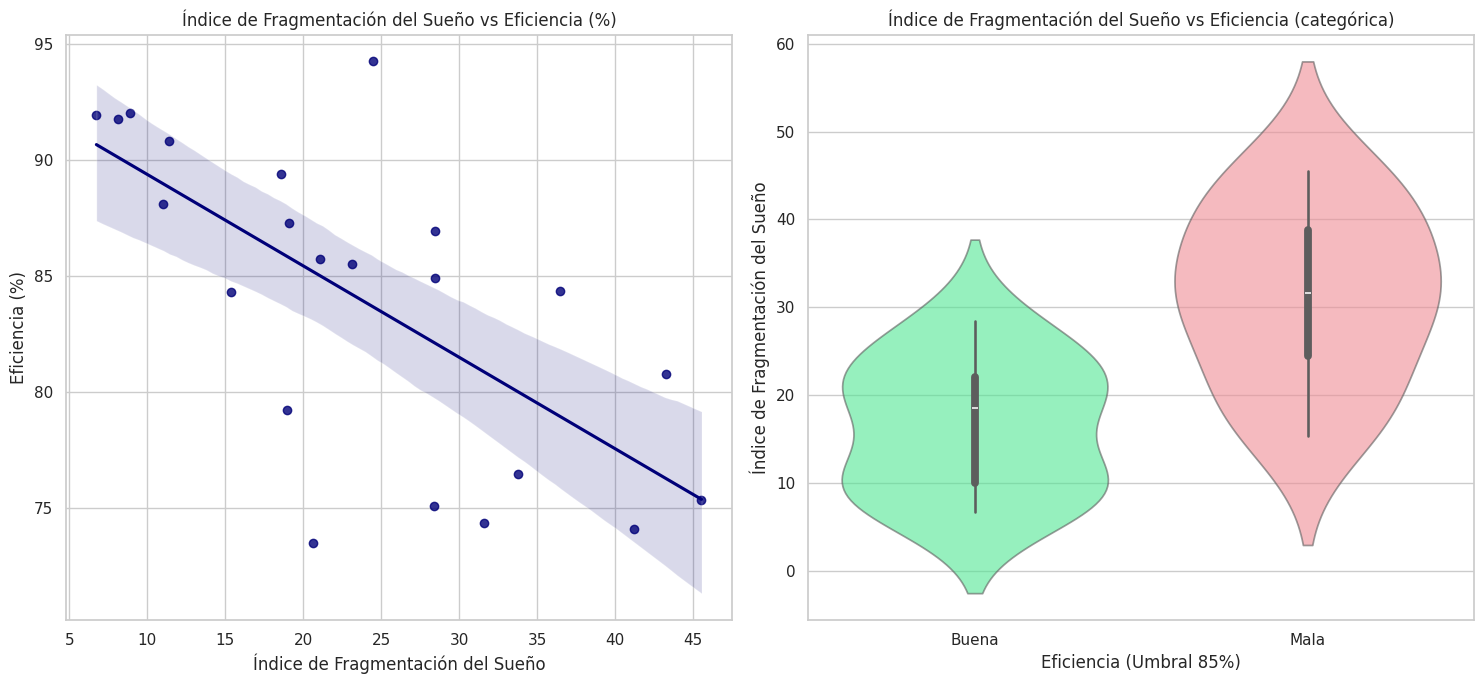

In [54]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Creamos una figura con 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# ax1 - SFI vs Sleep efficiency(%)
sns.regplot(data=df_sleep, x='Sleep Fragmentation Index', y='Efficiency', ax=ax1, color='#000078')
ax1.set_title('Índice de Fragmentación del Sueño vs Eficiencia (%)')
ax1.set_xlabel('Índice de Fragmentación del Sueño')
ax1.set_ylabel('Eficiencia (%)')

# Ax2 - SFI vs Sleep efficiency Category
sns.violinplot(data=df_sleep, x='Efficiency_bin', y='Sleep Fragmentation Index', ax=ax2, hue='Efficiency_bin', palette=['#38FF90', '#FF7D87'], legend=False, inner='box', alpha=0.6)
ax2.set_title('Índice de Fragmentación del Sueño vs Eficiencia (categórica)')
ax2.set_xlabel('Eficiencia (Umbral 85%)')
ax2.set_ylabel('Índice de Fragmentación del Sueño')

plt.tight_layout()
plt.show()

Aquí, de nuevo se confirma la lógica de que a mayor índice de fragmentación del sueño, menor eficiencia del sueño. Aquí si se puede afirmar con mayor seguridad que la eficiencia del sueño es menor cuando el índice de fragmentación del sueño es mayor. Pero también que para casos con baja eficiencia el indice de fragmentación del sueño es mayor. Cosa que no podíamos afirmar antes con la eficiencia y el número de despertares.

Es decir, parece haber una relación más clara para valores bajos de eficiencia con el indicie de fragmentacion del sueño. Mientras que para valores bajos de número de despertares no parece haber una relación clara con la eficiencia del sueño.

# 2. Guardamos el dataframe como un fichero pickle

In [55]:
# Establecemos user como la primera columna, el resto se mantienen igual
df_sleep = df_sleep[['User'] + [col for col in df_sleep.columns if col != 'User']]
df_sleep.reset_index(drop=True, inplace=True)

# Se establece el nombre del archivo 
out_folder = os.path.join('..', '0_data', "clean_MMASH")
filename = 'sleep_clean.pkl'

# Comprobamos si la carpeta existe, si no la creamos
if not os.path.exists(out_folder):
    os.makedirs(out_folder)

# Comprobamos si el archivo existe, de ser así lo eliminamos
if os.path.exists(os.path.join(out_folder, filename)):
    os.remove(os.path.join(out_folder, filename))

# Guardamos el df en un archivo pickle
df_sleep.to_pickle(os.path.join(out_folder, filename))


In [ ]:
df_sleep.to_csv(os.path.join(out_folder, 'sleep_clean.csv'), index=False)

# Bibliografía

[1]: Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sîrbu, A., Clifton, D. A., Martini, C., & Morelli, D. (2020). A Public Dataset of 24-h Multi-Levels Psycho-Physiological Responses in Young Healthy Adults. Data, 5(4), 91. https://doi.org/10.3390/data5040091

[2] Kuo, C.-E., Liang, S.-F., Shih, Y.-H., & Shaw, F.-Z. (2015). Evaluating the Sleep Quality Using Multiscale Entropy Analysis. 1st Global Conference on Biomedical Engineering & 9th Asian-Pacific Conference on Medical and Biological Engineering, 166–169. doi:10.1007/978-3-319-12262-5_46 